### Recommendation Engine 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files
from scipy.sparse import csr_matrix

In [0]:
def read_data(filename,delimiter,encoding='utf-8'):
  uploaded = files.upload()
  return pd.read_csv(io.BytesIO(uploaded[filename]),delimiter=delimiter,encoding=encoding)

In [0]:
ratings = read_data('u.data','\t')
ratings.columns = ['user_id','movie_id','rating','timestamp']
ratings.head()

Saving u.data to u.data


,user_id,movie_id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [0]:
items_df = read_data('u.item','|',encoding='latin-1')
items_df.columns = "movie_id|movie_title|release_date|video_release_date|IMDb_URL|unknown|Action|Adventure|Animation|Childrens|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western".split('|')
items_df.head()

Saving u.item to u.item


,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Rating Distribution

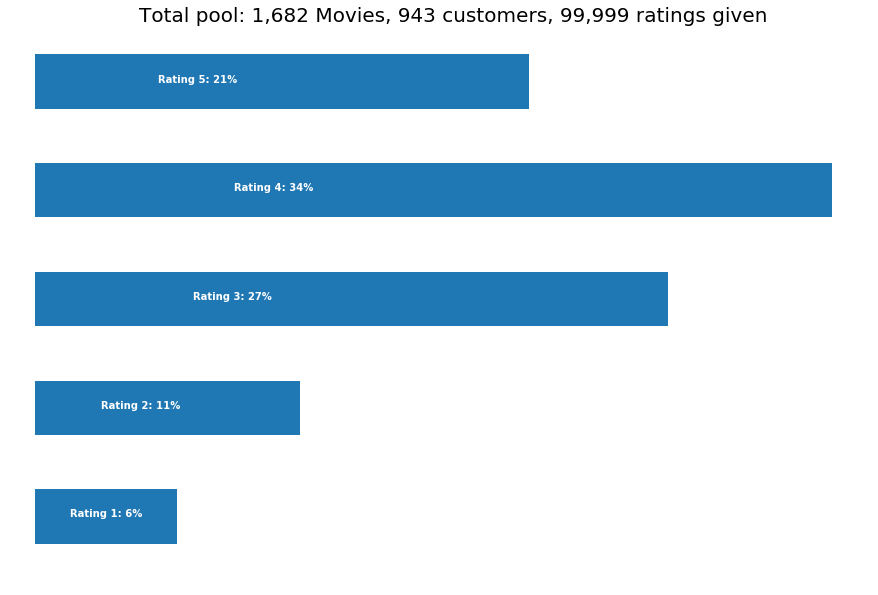

In [0]:
p = ratings.groupby('rating')['rating'].agg(['count'])

movie_count = ratings['movie_id'].nunique()

# get user
user_count = ratings['user_id'].nunique()

# get rating count
rating_count = ratings['user_id'].count()


ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, user_count, rating_count), fontsize=20)
plt.axis('off')


for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')
    
    
plt.show()

### Utilitiy Matrix

In [0]:
index=list(ratings['user_id'].unique())
columns=list(ratings['movie_id'].unique())
index=sorted(index)
columns=sorted(columns)

 
util_df=pd.pivot_table(data=ratings,values='rating',index='user_id',columns='movie_id')
util_df.head()

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,1.0,3.0,3.0,5.0,4.0,2.0,1.0,2.0,2.0,3.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Fill all NaN values to 0**


In [0]:
util_df = util_df.fillna(0)
util_df.head()

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,1.0,3.0,3.0,5.0,4.0,2.0,1.0,2.0,2.0,3.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we implement KNN to find nearest neighbours of movies so features are the user_ratings thus we transpose.



In [0]:
movie_df = util_df.transpose()
movie_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,1.0,5.0,4.0,5.0,0.0,3.0,5.0,0.0,5.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,4.0,3.0,3.0,4.0,0.0,3.0,5.0,3.0,5.0,0.0,0.0,5.0,0.0,3.0,3.0,0.0,4.0,3.0,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,3.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Train Test Split**

In [0]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(movie_df.T.reset_index(),test_size=0.2)

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
def Knn_movie,test_data,s(dataK=20):
  sorted_neighbours = sorted(data,key=lambda x: cosine_similarity(x[1:].reshape(1,-1),te,test_data,st_data),reverse=True)
  neighbours = [i[0] for i in sorted_neighbours[:K]]
  return neighbours

def get_movie_name(movie_id):
  return items_df.loc[items_df['movie_id'] == movie_id].iloc[0]['movie_title']


In [0]:
recommended_movie_ids = Knn_movies(train_set.values,test_set.values[0][1:].reshape(1,-1))
recommended_movies = [get_movie_name(id) for id in recommended_movie_ids]
print("Movie Recommendations for:",get_movie_name(test_set.values[0][0]))
recommended_movies

Movie Recommendations for: Amityville Curse, The (1990)


['Terminal Velocity (1994)',
 'Strictly Ballroom (1992)',
 'Star Trek: First Contact (1996)',
 'Butch Cassidy and the Sundance Kid (1969)',
 'Lord of Illusions (1995)',
 'Life Less Ordinary, A (1997)',
 'Mystery Science Theater 3000: The Movie (1996)',
 'I Know What You Did Last Summer (1997)',
 'Leaving Las Vegas (1995)',
 'Radioland Murders (1994)',
 'Funeral, The (1996)',
 'Chasing Amy (1997)',
 'Killing Zoe (1994)',
 'Jackie Brown (1997)',
 'To Die For (1995)',
 'Bob Roberts (1992)',
 "Ulee's Gold (1997)",
 'The Innocent (1994)',
 'Across the Sea of Time (1995)',
 'Breaking the Waves (1996)']

### Evaluating performance based on intra cosine similarity and coverage



In [0]:
total_unique_movies = len(np.unique(train_set.values[:,0]))
print("Unique movies in training set:",total_unique_movies)

Unique movies in training set: 754


In [0]:
cosine_distances = []
movie_recommended = {}
for movie in test_set.values:
  recommendations = Knn_movies(train_set.values,movie[1:].reshape(1,-1))
  for item in recommendations:
    if item in movie_recommended:
      movie_recommended[item] += 1
    else:
      movie_recommended[item] = 1
  
  recommendation_vectors = [movie_df.loc[i - 1].values for i in recommendations]
  cosine_distances.append(np.mean(pairwise_distances(recommendation_vectors,metric='cosine')))

print("Average Intra cosine similarity between recommendations:",np.mean(cosine_distances))
print("Movie Catalog Coverage: ",len(movie_recommended)/total_unique_movies * 100)

Average Intra cosine similarity between recommendations: 0.801618656000255
Movie Catalog Coverage:  78.24933687002653


## Neural Network based rating predictor


In [0]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau


from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG

from keras.layers.merge import dot
from keras.models import Model

Using TensorFlow backend.


In [0]:
users = ratings['user_id'].unique()
movies = ratings['movie_id'].unique()

userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

ratings['user_id'] = ratings['user_id'].apply(lambda x: userid2idx[x])
ratings['movie_id'] = ratings['movie_id'].apply(lambda x: movieid2idx[x])

**Splitting train and test**


In [0]:
split = np.random.rand(len(ratings)) < 0.8
train = ratings[split]
valid = ratings[~split]
print(train.shape , valid.shape)

(79816, 4) (20183, 4)


In [0]:
n_movies=len(ratings['movie_id'].unique())
n_users=len(ratings['user_id'].unique())
n_latent_factors=64  # hyperparamter to deal with. 

**Creating Input vectors for user_id and movie_id**


In [0]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
user_vec =Flatten(name='FlattenUsers')(user_embedding)

In [0]:
movie_input=Input(shape=(1,),name='movie_input',dtype='int64')
movie_embedding=Embedding(n_movies,n_latent_factors,name='movie_embedding')(movie_input)
movie_vec=Flatten(name='FlattenMovies')(movie_embedding)

**Dot product**


In [0]:
sim=dot([user_vec,movie_vec],name='Simalarity-Dot-Product',axes=1)
model =keras.models.Model([user_input, movie_input],sim)
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
movie_input (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 64)        60352       user_input[0][0]                 
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 64)        107648      movie_input[0][0]                
___________________________________________________________________________________________

**Setting up loss and optimization algorithm**


In [0]:
model.compile(optimizer=Adam(lr=1e-4),loss='mse')

In [0]:
batch_size=128
epochs=50
History = model.fit([train['user_id'],train['movie_id']],train['rating'], batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid['user_id'],valid['movie_id']],valid['rating']),
                              verbose = 1)




Train on 79816 samples, validate on 20183 samples
Epoch 1/50





79816/79816 [==============================] - 7s 93us/step - loss: 13.7425 - val_loss: 13.6647
Epoch 2/50
79816/79816 [==============================] - 3s 35us/step - loss: 13.7309 - val_loss: 13.6537
Epoch 3/50
79816/79816 [==============================] - 3s 35us/step - loss: 13.6927 - val_loss: 13.5901
Epoch 4/50
79816/79816 [==============================] - 3s 34us/step - loss: 13.5407 - val_loss: 13.3305
Epoch 5/50
79816/79816 [==============================] - 3s 34us/step - loss: 13.0713 - val_loss: 12.6333
Epoch 6/50
79816/79816 [==============================] - 3s 33us/step - loss: 12.0747 - val_loss: 11.3677
Epoch 7/50
79816/79816 [==============================] - 3s 34us/step - loss: 10.5493 - val_loss: 9.6626
Epoch 8/50
79816/79816 [==============================] - 3s 34us/step - loss: 8.7150 - val_loss: 7.7932
Epoch 9/50
79816/79816 [==============================] - 3s 35us/step - loss: 6.8595 - v

**graph of Loss W.R.T iterations**

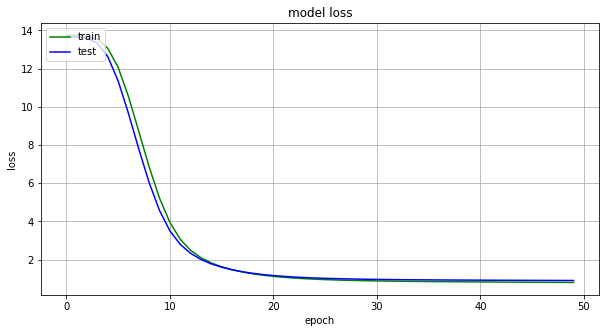

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [0]:
rating_matrix = movie_df.T.values

In [0]:
threshold = 4 #Threshold rating for recommendation
user_recommendations = {}
movie_recommended = {}
for i in range(10):
  for j in range(rating_matrix.shape[1]):
      if rating_matrix[i][j] == 0:
        predicted_rating = model.predict([[userid2idx[i+1]],[movieid2idx[j+1]]])
        if predicted_rating[0][0] > threshold: #Recommended Movie
            if i+1 in user_recommendations:
              user_recommendations[i+1].append(j+1)
            else:
              user_recommendations[i+1] = [j+1]
            
            if j+1 in movie_recommended:
              movie_recommended[j+1] += 1
            else:
              movie_recommended[j+1] = 1


print("Recommendations for user 1 :")
print([get_movie_name(id) for id in user_recommendations[1]])

Recommendations for user 1 :
['Sense and Sensibility (1995)', 'Secrets & Lies (1996)', "Ulee's Gold (1997)", 'L.A. Confidential (1997)', 'Mrs. Brown (Her Majesty, Mrs. Brown) (1997)', 'Titanic (1997)', 'Apt Pupil (1998)', 'As Good As It Gets (1997)', 'In the Name of the Father (1993)', "Schindler's List (1993)", 'Paradise Lost: The Child Murders at Robin Hood Hills (1996)', 'Apostle, The (1997)', "One Flew Over the Cuckoo's Nest (1975)", 'Close Shave, A (1995)', 'To Kill a Mockingbird (1962)', 'Harold and Maude (1971)', 'Day the Earth Stood Still, The (1951)', 'Duck Soup (1933)', 'Forbidden Planet (1956)', 'Butch Cassidy and the Sundance Kid (1969)', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)', 'Trainspotting (1996)', 'Philadelphia Story, The (1940)', 'Vertigo (1958)', 'North by Northwest (1959)', 'Apartment, The (1960)', 'Some Like It Hot (1959)', 'Casablanca (1942)', 'Maltese Falcon, The (1941)', 'Roman Holiday (1953)', 'Sunset Blvd. (1950)', 'Notori

**Performance Evaluation based on personalization and intra cosine similarity**

In [0]:
cosine_distances = []
for user in user_recommendations:
  recommendation_vectors = [movie_df.loc[i - 1].values for i in recommendations]
  cosine_distances.append(np.mean(pairwise_distances(recommendation_vectors,metric='cosine')))

print("Average Intra cosine similarity between recommendations:",np.mean(cosine_distances))
print("Coverage: ",len(movie_recommended)/len(movieid2idx) * 100)

Average Intra cosine similarity between recommendations: 0.7819319388747732
Coverage:  33.94768133174792


## Clustering based recommendation


In [0]:
from sklearn.cluster import KMeans

Group Users that have rated movies similarly and recommended movies within the group

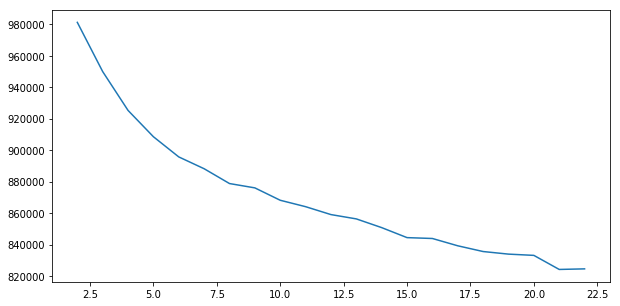

Optimal K 21


In [0]:
costs = []
threshold = 0.2 ## Threshold difference to find optimal K
k = 2
while True:
    nmodel = KMeans(n_clusters = k).fit(rating_matrix) #Your model
    cost = nmodel.inertia_
    
    if len(costs) > 0 and costs[-1][1] - cost < threshold:
        optimalK = costs[-1][0]
        costs.append([k,cost])
        break
    costs.append([k,cost])

    k += 1
    
costs = np.array(costs)
plt.plot(costs[:,0],costs[:,1])
plt.show()

print("Optimal K",optimalK)

In [0]:
model = KMeans(n_clusters=optimalK).fit(rating_matrix)

Creating Groups

In [0]:
groups = model.labels_
user_groups = {}
for i in range(len(groups)):
  if groups[i] in user_groups:
    user_groups[groups[i]].append(i+1)
  else:
    user_groups[groups[i]] = [i+1]

for group in sorted(user_groups):
  print("Users in group",group)
  print(user_groups[group])
  print()

Users in group 0
[59, 94, 303, 429]

Users in group 1
[5, 14, 23, 49, 148, 177, 214, 264, 307, 456, 496, 542, 601, 773, 795, 806, 838, 868, 913]

Users in group 2
[15, 26, 52, 54, 57, 63, 75, 81, 84, 101, 104, 117, 141, 159, 164, 168, 181, 190, 223, 251, 265, 274, 277, 294, 336, 348, 357, 396, 403, 432, 434, 459, 463, 486, 501, 518, 525, 534, 540, 552, 569, 595, 599, 624, 630, 634, 637, 697, 699, 708, 714, 717, 718, 722, 733, 768, 770, 825, 872, 891, 907, 923, 935, 936, 938, 939]

Users in group 3
[38, 42, 43, 70, 83, 128, 152, 174, 230, 244, 254, 262, 290, 295, 314, 318, 330, 541, 554, 577, 588, 593, 620, 632, 654, 711, 712, 751, 764, 786, 798, 882, 885, 887, 901, 922, 927]

Users in group 4
[6, 10, 90, 184, 189, 233, 239, 321, 354, 380, 385, 409, 437, 452, 454, 503, 527, 535, 543, 567, 608, 659, 664, 666, 707, 840, 848, 934]

Users in group 5
[1, 92, 201, 269, 299, 305, 327, 334, 343, 387, 537, 561, 592, 655, 758, 823, 870, 883, 886, 889, 916]

Users in group 6
[2, 17, 21, 27, 32, 45

In [0]:
rec = []
uid = 4
group  = groups[uid]
neighbours = user_groups[group]
threshold = 4
for j in range(rating_matrix.shape[1]):
  if rating_matrix[uid][j] == 0:
    neighbour_ratings = []
    for k in neighbours:
      if rating_matrix[k][j] != 0 and k != uid:
        neighbour_ratings.append(rating_matrix[k][j])

    if len(neighbour_ratings) > 0 and np.mean(neighbour_ratings) > threshold: #Recommend
       rec.append(j+1)


print("Recommendations for user",uid,"based on cluster:")
print([get_movie_name(id) for id in rec]) 

Recommendations for user 4 based on cluster:
['Usual Suspects, The (1995)', 'Postino, Il (1994)', 'Crumb (1994)', 'Billy Madison (1995)', 'Legends of the Fall (1994)', 'Pulp Fiction (1994)', 'Three Colors: Red (1994)', 'Shawshank Redemption, The (1994)', 'Lion King, The (1994)', 'Hudsucker Proxy, The (1994)', 'Searching for Bobby Fischer (1993)', 'Wallace & Gromit: The Best of Aardman Animation (1996)', 'Godfather, The (1972)', "Breakfast at Tiffany's (1961)", 'Wizard of Oz, The (1939)', 'Citizen Kane (1941)', 'Mr. Smith Goes to Washington (1939)', 'Big Night (1996)', 'Long Kiss Goodnight, The (1996)', 'Dirty Dancing (1987)', 'Platoon (1986)', 'Good, The Bad and The Ugly, The (1966)', 'Godfather: Part II, The (1974)', 'Henry V (1989)', 'Amadeus (1984)', 'Raging Bull (1980)', 'Terminator, The (1984)', 'Groundhog Day (1993)', 'Cyrano de Bergerac (1990)', 'Sling Blade (1996)', 'Raising Arizona (1987)', 'Pillow Book, The (1995)', 'Hunt for Red October, The (1990)', 'Full Monty, The (1997)'